In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [2]:
tickers = ['PG', 'MSFT', 'F', 'GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6849 entries, 1995-01-03 to 2022-03-15
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6849 non-null   float64
 1   MSFT    6849 non-null   float64
 2   F       6849 non-null   float64
 3   GE      6849 non-null   float64
dtypes: float64(4)
memory usage: 267.5 KB


In [4]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,7.971814,2.377004,3.953287,31.972109
1995-01-04,7.907916,2.394283,4.059653,31.972109
1995-01-05,7.796090,2.354790,4.024196,32.050484
1995-01-06,7.812064,2.394283,4.024196,31.893742
1995-01-09,7.780111,2.379472,4.095109,31.580296


In [5]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2022-03-09,148.770004,288.500000,16.370001,91.250000
2022-03-10,144.940002,285.589996,16.330000,91.330002
2022-03-11,143.220001,280.070007,16.040001,92.279999
2022-03-14,145.050003,276.440002,15.740000,92.449997
2022-03-15,150.270004,287.149994,16.059999,92.349998


In [6]:
mydata.iloc[0]

PG       7.971814
MSFT     2.377004
F        3.953287
GE      31.972109
Name: 1995-01-03 00:00:00, dtype: float64

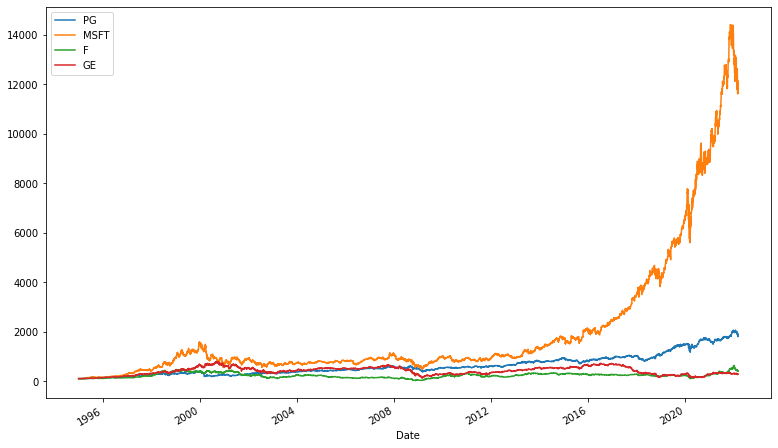

In [14]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (13, 8))
plt.show()

In [9]:
mydata.loc['1995-01-03']

PG       7.971814
MSFT     2.377004
F        3.953287
GE      31.972109
Name: 1995-01-03 00:00:00, dtype: float64

In [11]:
mydata.iloc[0]

PG       7.971814
MSFT     2.377004
F        3.953287
GE      31.972109
Name: 1995-01-03 00:00:00, dtype: float64

In [15]:
#CALCULANDO O RETORNO DE UM PORTIFÓLIO (Calculating the Return of a Portifolio of Securities)

In [16]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014141,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006186,0.017622,-0.009828


In [17]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [18]:
np.dot(returns, weights)

array([        nan,  0.00653984, -0.00922959, ..., -0.00963805,
       -0.00426115,  0.02349471])

In [20]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.132285
MSFT    0.224062
F       0.131650
GE      0.090136
dtype: float64

In [21]:
np.dot(annual_returns, weights)

0.14453321726832535

In [22]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 5) * 100) + '%'
print(pfolio_1)

14.453%


In [23]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [25]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2), 5) * 100) + '%'
print(pfolio_1)
print(pfolio_2)

14.453%
16.679%
